In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy

consumer_key = "1ql1IqV5VVuzf7x2h9HPeoDmA"
consumer_secret = "gntwsABvaBFrFsU0uJkNwZFoN5TVbZxyONqJcgS4q4qTBnvNaP"
access_token = "3248105978-m0Jf4VbytigMRr5DU0IY6qkVXX8rhcd2qlfhTOo"
access_token_secret = "TsH0IthrA6jUGpj2KkL1u3V00JudY2xSke3ZZBzOdZLjx"

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [12]:
sources = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]

In [14]:
dictionary_tweets = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}

#100 from each source
for x in range(5):
    
    for source in sources:

        tweets = api.user_timeline(source, page=x)

        for tweet in tweets:
            dictionary_tweets["tweet_source"].append(tweet["user"]["name"])
            dictionary_tweets["tweet_text"].append(tweet["text"])
            dictionary_tweets["tweet_date"].append(tweet["created_at"])
            dictionary_tweets["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            dictionary_tweets["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            dictionary_tweets["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            dictionary_tweets["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

In [16]:
tweet_df = pd.DataFrame(dictionary_tweets, columns=["tweet_source", 
                                             "tweet_text", 
                                             "tweet_date",
                                             "tweet_vader_score",
                                             "tweet_pos_score",
                                             "tweet_neu_score",
                                             "tweet_neg_score"])

In [19]:
tweet_df.to_csv("News_tweets.csv")

In [20]:
tweet_df.count()

tweet_source         500
tweet_text           500
tweet_date           500
tweet_vader_score    500
tweet_pos_score      500
tweet_neu_score      500
tweet_neg_score      500
dtype: int64

In [18]:
tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,Robert Mueller's team begins seizing Manafort'...,Sat Oct 06 10:55:00 +0000 2018,0.1779,0.134,0.866,0.0
1,Fox News,Jim McLaughlin: “They’re seeing the radicaliza...,Sat Oct 06 10:50:00 +0000 2018,0.6369,0.245,0.755,0.0
2,Fox News,Jim McLaughlin on @Sen_JoeManchin: “It was all...,Sat Oct 06 10:45:02 +0000 2018,0.0000,0.000,1.000,0.0
3,Fox News,U.S. Senators make remarks about the nominatio...,Sat Oct 06 10:41:29 +0000 2018,0.5574,0.194,0.806,0.0
4,Fox News,Senate expected to confirm Kavanaugh today @fo...,Sat Oct 06 10:40:00 +0000 2018,0.0000,0.000,1.000,0.0


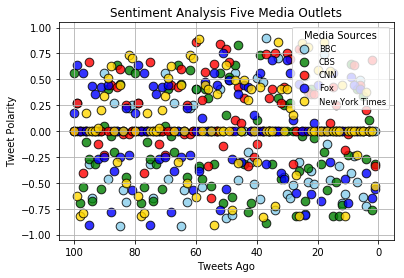

In [23]:
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="skyblue", s=75,
            alpha=0.8, label="BBC")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CBS News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CBS News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="green", s=75,
            alpha=0.8, label="CBS")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CNN"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=75,
            alpha=0.8, label="CNN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "Fox News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "Fox News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="b", s=75,
            alpha=0.8, label="Fox")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "The New York Times"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "The New York Times"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="gold", s=75,
            alpha=0.8, label="New York Times")

plt.legend(fontsize="small", loc="upper right", title="Media Sources")

plt.title("Sentiment Analysis Five Media Outlets")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

plt.savefig("Tweet_Polarity_Scatter_Analysis")

plt.show()

In [24]:
tweet_df_polarity = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

pd.DataFrame(tweet_df_polarity)

,tweet_vader_score
tweet_source,
BBC News (World),-0.124792
CBS News,-0.091917
CNN,0.155659
Fox News,-0.002619
The New York Times,0.061312


In [25]:
tweets_polarity = (tweet_df_polarity["BBC News (World)"], 
                    tweet_df_polarity["CBS News"], 
                    tweet_df_polarity["CNN"], 
                    tweet_df_polarity["Fox News"],
                    tweet_df_polarity["The New York Times"])

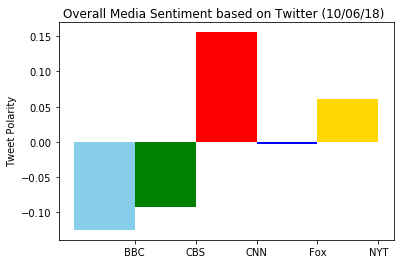

In [30]:
fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))  
width = 1
bbc = ax.bar(ind[0], tweets_polarity[0], width, color="skyblue")
cbs = ax.bar(ind[1], tweets_polarity[1], width, color="green")
cnn = ax.bar(ind[2], tweets_polarity[2], width, color="red")
fox = ax.bar(ind[3], tweets_polarity[3], width, color='blue')
nyt = ax.bar(ind[4], tweets_polarity[4], width, color='gold')

ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter (%s) " % (time.strftime("%x")))
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
ax.grid(False)

plt.savefig("Bar_average_sentiment_analysis")